In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
sns.set(rc={'figure.figsize':(6,8)}) 

import warnings
warnings.simplefilter("ignore")

%matplotlib inline

from sklearn.preprocessing import LabelEncoder 

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.metrics import SCORERS
import re

import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Functions

In [2]:
def cleanTxt(txt):
    txt = txt.lower()
    txt = re.sub(r'RT[\s]+', '', txt) #removing RT
    txt = re.sub(r'[^\w\s]','', txt) #remove everything except words and space
    txt = re.sub(r'_','', txt) #how to remove underscore as well
    txt = re.sub('\r\n', '', txt)
    txt = re.sub('amp', '', txt) # removing ampersand
    if 'https' in txt: # removing hyperlinks 
        pos = txt.find('https')
        txt = txt[:pos]
    return txt

In [3]:
def stopWords(txt): 
    txt_lst = txt.split(" ")
    txt_lst = [word for word in txt_lst if word not in stopwords.words('english')]
    txt_lst = [wnet.lemmatize(word) for word in txt_lst]
    txt_lst = [word for word in txt_lst if word != '']
    txt_lst = [word for word in txt_lst if word != 'u0001f449'] # indicates back hand emoji pointing right
    txt_lst = [word for word in txt_lst if word != 'data']
    txt_lst = [word for word in txt_lst if word != 'privacy']
    txt_lst = [word for word in txt_lst if word != 'u']
    return " ".join(txt_lst)

In [4]:
def evaluate_k_kmeans_inertia(k):
    print(f"running Kmeans with k={k}")
    estimator_kmeans = KMeans(random_state=42, n_clusters=k)
    estimator_kmeans.fit(text_vec)
    return estimator_kmeans.inertia_

In [5]:
!pip install geopy
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent = "geoapiExercises")
#Not sure if it's just me but I have to add the first line or it gives me a not defined - Shuwen
def findCountry(txt):
    if txt is np.nan:
        return 'Unknown'
    x = geolocator.geocode(txt)
    if x is None:
        return 'Unknown'
    loc = x.address.split(',')[-1]
    if loc[0] == " ":
        loc = loc[1:]
    return loc

In [6]:
def cluster_summary(ci, df):
    cluster = df[df.cluster_id==ci]
    cluster_summary = cluster[categorical_data.columns].mode().to_dict(orient="records")[0]
    cluster_summary.update(cluster.mean().to_dict())
    return cluster_summary

In [7]:
# we can make a function that puts comparisons side by side so its easier for us to see in a data frame 

def cluster_comparison(*cluster_ids):
    summaries = []
    for cluster_id in cluster_ids:
        summaries.append(cluster_summary(cluster_id, df2))
    return pd.DataFrame(summaries).set_index("cluster_id").T

In [8]:
def kmeans_cluster(df, n_clusters=2):
    """This function assigns clusters to every row in the dataframe via kmeans"""
    model = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = model.fit_predict(df)
    cluster_results = df.copy()
    cluster_results['Cluster'] = clusters
    return cluster_results

In [9]:
def graph_summary_clustering(results):
    """this function produces a summary of the clusters"""
    cluster_size = results.groupby(['Cluster']).size().reset_index()
    cluster_size.columns = ['Cluster', 'Count']
    cluster_means = results.groupby(['Cluster'], as_index=False).mean()
    cluster_summary = pd.merge(cluster_size, cluster_means, on='Cluster')
    cluster_summary = cluster_summary.drop(["Count"], axis=1).set_index("Cluster")
    return cluster_summary[sorted(cluster_summary.columns)]

# Data Privacy Tweets

In [10]:
data = pd.read_csv('data_privacy_tweets.csv')

In [11]:
data = data.drop_duplicates('text')
data.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,statuses_count,favourites_count,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url
0,x1166589525386301440,x1404485195676459008,2021-06-14 17:05:39,privacy_issues,The @EFF finds that the proposed modifications...,TweetDeck,248,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/11665895...,NaN,http://pbs.twimg.com/profile_images/1166589644...
1,x1166589525386301440,x1403010409473449986,2021-06-10 15:25:22,privacy_issues,The European Parliament passes the new #EU #CO...,TweetDeck,223,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/11665895...,NaN,http://pbs.twimg.com/profile_images/1166589644...
2,x1166589525386301440,x1404185087093182465,2021-06-13 21:13:07,privacy_issues,To gain better control over the increasingly p...,TweetDeck,240,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/11665895...,NaN,http://pbs.twimg.com/profile_images/1166589644...
3,x1166589525386301440,x1401833811940306947,2021-06-07 09:30:00,privacy_issues,What if the consumers are on the driving seat ...,TweetDeck,255,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/11665895...,NaN,http://pbs.twimg.com/profile_images/1166589644...
4,x1166589525386301440,x1401555697163280387,2021-06-06 15:04:52,privacy_issues,"""Vera Jourová says new rules are needed to lim...",TweetDeck,230,NaN,NaN,NaN,...,1036,2177,2019-08-28 05:53:33,False,https://t.co/HFMGW8U18M,http://bit.ly/privacyissuessignup,NaN,https://pbs.twimg.com/profile_banners/11665895...,NaN,http://pbs.twimg.com/profile_images/1166589644...


In [208]:
data.shape

(10637, 90)

In [12]:
df = data[["text", "is_quote", "is_retweet", "retweet_count", "hashtags", "followers_count"]]

In [13]:
text = df[["text"]][:10000] # using subset for now so it will run faster
pd.set_option('display.max_colwidth', -1)
text.head()

,text
0,"The @EFF finds that the proposed modifications to the HIPAA would ""invade your most personal and intimiate health data."" \r\n\r\nStating that trust in healthcare is crucial and especially so during the #COVID pandemic.\r\n\r\nRead more: https://t.co/ReuoQ3mF9p"
1,The European Parliament passes the new #EU #COVID19 Certificate Regulation detailing peoples' COVID information.\r\n\r\nPromising that all personal data will be processed in line with the #GDPR\r\n\r\nRead more: https://t.co/8PGuChsV5F
2,"To gain better control over the increasingly powerful technology sector in #China, new regulations in China make it harder for big tech to refuse the government's request for #datasharing. \r\n\r\n#datasecurity\r\n\r\nRead more: https://t.co/piSfs3NW4J"
3,What if the consumers are on the driving seat to agree or disagree to the #privacypolicy of the #tech giants? Article by Beth Magnuson\r\nexplains #DataPrivacy &amp; #innovation on @VentureBeat \r\n\r\nhttps://t.co/n2pFOwWSmi\r\n\r\n#PrivacyTech #Technology #DataPrivacy
4,"""Vera Jourová says new rules are needed to limit the bulk collection of Europeans’ data.""\r\n\r\nThe #EU is requiring new legislation limiting #US government agencies from accessing European data. \r\n\r\nRead more at: https://t.co/04avhPjhCd"


# Data cleaning

In [14]:
wnet = WordNetLemmatizer()
port = PorterStemmer()

In [15]:
text['text'] = text['text'].apply(cleanTxt)
text.head()

,text
0,the eff finds that the proposed modifications to the hipaa would invade your most personal and intimiate health data stating that trust in healthcare is crucial and especially so during the covid pandemicread more
1,the european parliament passes the new eu covid19 certificate regulation detailing peoples covid informationpromising that all personal data will be processed in line with the gdprread more
2,to gain better control over the increasingly powerful technology sector in china new regulations in china make it harder for big tech to refuse the governments request for datasharing datasecurityread more
3,what if the consumers are on the driving seat to agree or disagree to the privacypolicy of the tech giants article by beth magnusonexplains dataprivacy innovation on venturebeat
4,vera jourová says new rules are needed to limit the bulk collection of europeans datathe eu is requiring new legislation limiting us government agencies from accessing european data read more at


In [16]:
text['text'] = text['text'].apply(stopWords)
text.head()

,text
0,eff find proposed modification hipaa would invade personal intimiate health stating trust healthcare crucial especially covid pandemicread
1,european parliament pass new eu covid19 certificate regulation detailing people covid informationpromising personal processed line gdprread
2,gain better control increasingly powerful technology sector china new regulation china make harder big tech refuse government request datasharing datasecurityread
3,consumer driving seat agree disagree privacypolicy tech giant article beth magnusonexplains dataprivacy innovation venturebeat
4,vera jourová say new rule needed limit bulk collection european datathe eu requiring new legislation limiting government agency accessing european read


# Vectorizing Data

Vectorizing using Binary Term Frequency (https://towardsdatascience.com/getting-started-with-text-vectorization-2f2efbec6685). Binary Term Frequency captures presence (1) or absence (0) of term in document. For this part, under TfidfVectorizer, we set binary parameter equal to true so that it can show just presence (1) or absence (0) and norm parameter equal to false.

In [58]:
text_lst = []
for row in text['text']:
    text_lst.append(row)

text_lst[:5]

['eff find proposed modification hipaa would invade personal intimiate health stating trust healthcare crucial especially covid pandemicread',
 'european parliament pass new eu covid19 certificate regulation detailing people covid informationpromising personal processed line gdprread',
 'gain better control increasingly powerful technology sector china new regulation china make harder big tech refuse government request datasharing datasecurityread',
 'consumer driving seat agree disagree privacypolicy tech giant article beth magnusonexplains dataprivacy innovation venturebeat',
 'vera jourová say new rule needed limit bulk collection european datathe eu requiring new legislation limiting government agency accessing european read']

In [215]:
tv = TfidfVectorizer(
binary = True, norm = None,
use_idf = False, smooth_idf = False,
lowercase = True, stop_words = None,
min_df = 1, max_df = 1.0, max_features = None, ngram_range = (1,1))

In [298]:
text_vec = pd.DataFrame(tv.fit_transform(text_lst).toarray(), columns = tv.get_feature_names())
text_vec.head()

,0001860173,007cybersecurity,01,010,0100,020,05,050,06,0613you,...,zoomecertificates,zoominfo,zootokenio,zscaler,zuboff,zuck,zuckerberg,zumbullaw,zunit14,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# List of Words

In [217]:
dp_words = [] # dp for data privacy

for row in text['text']:
    for word in str(row).split(" "):
        dp_words.append(word)
        
dp_words[:5]

['eff', 'find', 'proposed', 'modification', 'hipaa']

In [218]:
len(dp_words)

150831

In [219]:
from nltk.probability import FreqDist
fdist = FreqDist()
for word in dp_words:
    fdist[word]+=1
fdist

FreqDist({'new': 1138, 'apple': 1069, 'security': 1060, 'user': 873, 'protection': 657, 'policy': 626, 'company': 620, 'personal': 610, 'law': 610, 'concern': 557, ...})

In [220]:
freq_data = pd.DataFrame.from_dict(fdist.most_common(20))

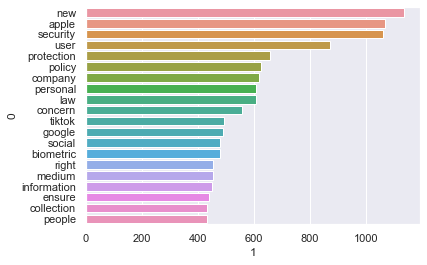

In [221]:
sns.barplot(data = freq_data, x = 1, y = 0);

In [222]:
most_common = []

for key in fdist.most_common(20):
    most_common.append(key[0])
    
most_common

['new',
 'apple',
 'security',
 'user',
 'protection',
 'policy',
 'company',
 'personal',
 'law',
 'concern',
 'tiktok',
 'google',
 'social',
 'biometric',
 'right',
 'medium',
 'information',
 'ensure',
 'collection',
 'people']

# Clustering

In [223]:
%%time 
range_k = [i for i in range(1, 4)]
results_k = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k)

running Kmeans with k=1
running Kmeans with k=2
running Kmeans with k=3
Wall time: 1min 36s


In [224]:
results_k

{1: 142099.7207999988, 2: 138655.0305585536, 3: 137618.35803155616}

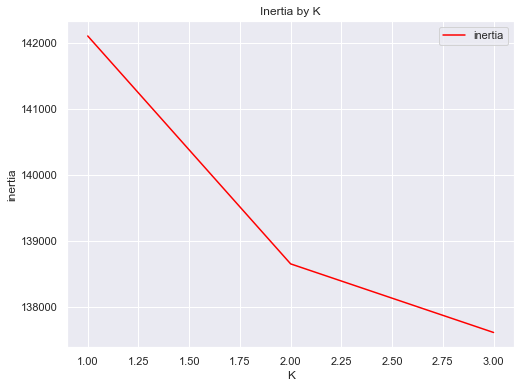

In [225]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K")
ax.legend();
# try 2, 3, 8 clusters.

## Cluster Analysis

In [226]:
estimator_kmeans = KMeans(random_state=42, n_clusters=3) # try 2, 3, 8 clusters.
estimator_kmeans.fit(text_vec)

KMeans(n_clusters=3, random_state=42)

In [227]:
text_vec["cluster_id"] = estimator_kmeans.labels_
text_vec.head()

,0001860173,007cybersecurity,01,010,0100,020,05,050,06,0613you,...,zoominfo,zootokenio,zscaler,zuboff,zuck,zuckerberg,zumbullaw,zunit14,zurich,cluster_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [228]:
text_clusters = text_vec.groupby('cluster_id').sum()
text_clusters.head()

,0001860173,007cybersecurity,01,010,0100,020,05,050,06,0613you,...,zoomecertificates,zoominfo,zootokenio,zscaler,zuboff,zuck,zuckerberg,zumbullaw,zunit14,zurich
cluster_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
1,1.0,7.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,3.0,1.0,1.0,1.0,6.0,9.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [229]:
text_clusters_20 = text_clusters[['new',
 'apple',
 'security',
 'user',
 'protection',
 'policy',
 'company',
 'personal',
 'law',
 'concern',
 'tiktok',
 'google',
 'social',
 'biometric',
 'right',
 'medium',
 'information',
 'ensure',
 'collection',
 'people']
]

text_clusters_20.head()

,new,apple,security,user,protection,policy,company,personal,law,concern,tiktok,google,social,biometric,right,medium,information,ensure,collection,people
cluster_id,,,,,,,,,,,,,,,,,,,,
0,991.0,227.0,56.0,114.0,69.0,51.0,65.0,62.0,73.0,66.0,22.0,37.0,19.0,35.0,30.0,7.0,23.0,10.0,29.0,31.0
1,0.0,680.0,904.0,665.0,565.0,557.0,513.0,521.0,475.0,338.0,323.0,386.0,139.0,278.0,375.0,130.0,390.0,112.0,276.0,369.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,145.0,0.0,0.0,312.0,0.0,0.0,312.0,0.0,311.0,0.0,0.0


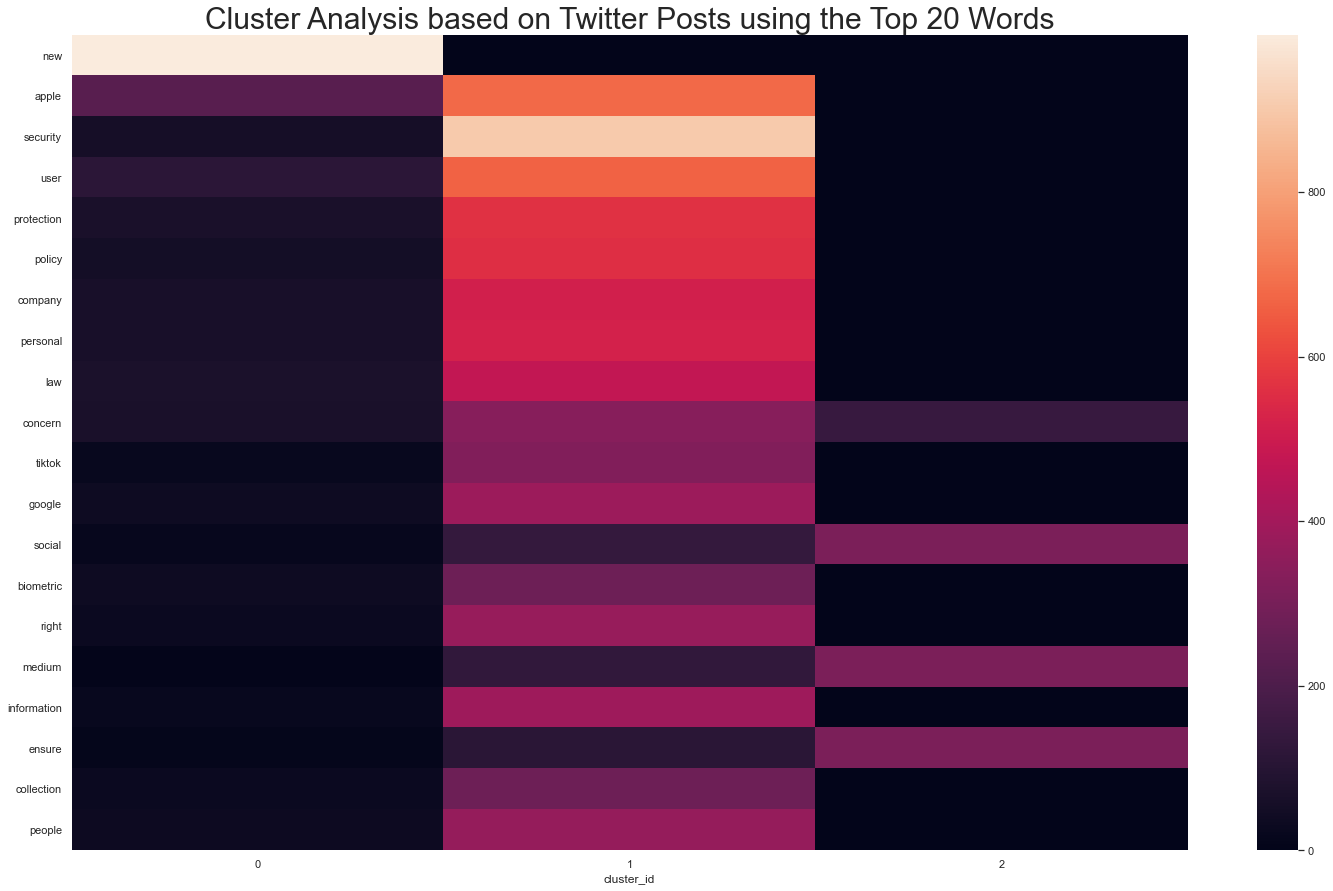

In [230]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(text_clusters_20.transpose(), annot=False)
plt.title("Cluster Analysis based on Twitter Posts using the Top 20 Words", size = 30);

# Sentiment Analysis

In [22]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sid_obj = SentimentIntensityAnalyzer()
text['scores'] = text['text'].apply(lambda review: sid_obj.polarity_scores(review))

In [23]:
text.head()

,text,scores
0,eff find proposed modification hipaa would invade personal intimiate health stating trust healthcare crucial especially covid pandemicread,"{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.5106}"
1,european parliament pass new eu covid19 certificate regulation detailing people covid informationpromising personal processed line gdprread,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"
2,gain better control increasingly powerful technology sector china new regulation china make harder big tech refuse government request datasharing datasecurityread,"{'neg': 0.081, 'neu': 0.586, 'pos': 0.333, 'compound': 0.7845}"
3,consumer driving seat agree disagree privacypolicy tech giant article beth magnusonexplains dataprivacy innovation venturebeat,"{'neg': 0.139, 'neu': 0.588, 'pos': 0.273, 'compound': 0.3612}"
4,vera jourová say new rule needed limit bulk collection european datathe eu requiring new legislation limiting government agency accessing european read,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}"


In [24]:
text['compound']  = text['scores'].apply(lambda score_dict: score_dict['compound'])
text.head()

,text,scores,compound
0,eff find proposed modification hipaa would invade personal intimiate health stating trust healthcare crucial especially covid pandemicread,"{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.5106}",0.5106
1,european parliament pass new eu covid19 certificate regulation detailing people covid informationpromising personal processed line gdprread,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000
2,gain better control increasingly powerful technology sector china new regulation china make harder big tech refuse government request datasharing datasecurityread,"{'neg': 0.081, 'neu': 0.586, 'pos': 0.333, 'compound': 0.7845}",0.7845
3,consumer driving seat agree disagree privacypolicy tech giant article beth magnusonexplains dataprivacy innovation venturebeat,"{'neg': 0.139, 'neu': 0.588, 'pos': 0.273, 'compound': 0.3612}",0.3612
4,vera jourová say new rule needed limit bulk collection european datathe eu requiring new legislation limiting government agency accessing european read,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000


In [25]:
text['comp_score'] = text['compound'].apply(lambda c: 'pos' if c >=0.05 else ('neg' if c <= -0.05 else 'neutral'))

text.head()

,text,scores,compound,comp_score
0,eff find proposed modification hipaa would invade personal intimiate health stating trust healthcare crucial especially covid pandemicread,"{'neg': 0.0, 'neu': 0.829, 'pos': 0.171, 'compound': 0.5106}",0.5106,pos
1,european parliament pass new eu covid19 certificate regulation detailing people covid informationpromising personal processed line gdprread,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral
2,gain better control increasingly powerful technology sector china new regulation china make harder big tech refuse government request datasharing datasecurityread,"{'neg': 0.081, 'neu': 0.586, 'pos': 0.333, 'compound': 0.7845}",0.7845,pos
3,consumer driving seat agree disagree privacypolicy tech giant article beth magnusonexplains dataprivacy innovation venturebeat,"{'neg': 0.139, 'neu': 0.588, 'pos': 0.273, 'compound': 0.3612}",0.3612,pos
4,vera jourová say new rule needed limit bulk collection european datathe eu requiring new legislation limiting government agency accessing european read,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}",0.0000,neutral


In [26]:
comp_score_counts = text.comp_score.value_counts()
# weirdly a good chunk of them are actually postiive

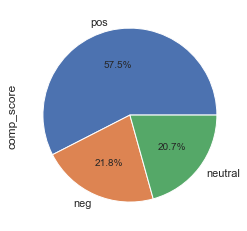

In [236]:
comp_score_counts.plot.pie(autopct="%.1f%%");

# Identifying Columns
## Cleaning Data

In [237]:
ident = data[["verified", "lang", "location", "followers_count", "description", "user_id"]] # can always change later
ident = ident.drop_duplicates()

In [238]:
ident = ident.dropna()
ident.head()

,verified,lang,location,followers_count,description,user_id
0,False,en,EU,406,bi-monthly newsletter on #privacy #design #product #technology & more by @MiraNova_Tweet & the team. We are open for collabs. All info via DM.,x1166589525386301440
6,False,en,Singapore,64,"Gamer, Security and Privacy Blogger, author @bestvpnguru",x1037366296122413063
21,False,en,United States of America,2228,Global Counterespionage Specialists | Cyber TSCM,x14569114
25,False,en,"Los Gatos, California",1009,"4Thought Marketing specializes in offering custom solutions designed to enhance @Eloqua, including Integrations, Custom Programs, and Strategic Consulting.",x131236988
28,False,en,"Loveland, CO",537,"Personal account - nothing here is the opinion of my employer. Staff Engineer at Liqid, Inc.",x25927802


In [239]:
ident['description'] = ident['description'].apply(cleanTxt)

ident.head()

,verified,lang,location,followers_count,description,user_id
0,False,en,EU,406,bimonthly newsletter on privacy design product technology more by miranovatweet the team we are open for collabs all info via dm,x1166589525386301440
6,False,en,Singapore,64,gamer security and privacy blogger author bestvpnguru,x1037366296122413063
21,False,en,United States of America,2228,global counterespionage specialists cyber tscm,x14569114
25,False,en,"Los Gatos, California",1009,4thought marketing specializes in offering custom solutions designed to enhance eloqua including integrations custom programs and strategic consulting,x131236988
28,False,en,"Loveland, CO",537,personal account nothing here is the opinion of my employer staff engineer at liqid inc,x25927802


In [240]:
'''bug here - potentially caused by the wordcloud because it also uses the stopwords
(solved by moving the word cloud section to the end but would show up again if run it now) -Shuwen'''

ident['description'] = ident['description'].apply(stopWords)

In [242]:
desc = ident[['description']]
desc.head()

,description
0,bimonthly newsletter design product technology miranovatweet team open collabs info via dm
6,gamer security blogger author bestvpnguru
21,global counterespionage specialist cyber tscm
25,4thought marketing specializes offering custom solution designed enhance eloqua including integration custom program strategic consulting
28,personal account nothing opinion employer staff engineer liqid inc


In [243]:
desc_lst = []
for row in desc['description']:
    desc_lst.append(row)

desc_lst[:5] # need to make into a list so the vectorizer will work

['bimonthly newsletter design product technology miranovatweet team open collabs info via dm',
 'gamer security blogger author bestvpnguru',
 'global counterespionage specialist cyber tscm',
 '4thought marketing specializes offering custom solution designed enhance eloqua including integration custom program strategic consulting',
 'personal account nothing opinion employer staff engineer liqid inc']

In [244]:
desc_vec = pd.DataFrame(tv.fit_transform(desc_lst).toarray(), columns = tv.get_feature_names())
desc_vec.head()

,00,001,003u0001f4e9,01,01257,01524,01772,01865,01912790228,02,...,électrique,électronique,éliminer,étudiant,éxito,êtes,être,òtító,öh,örebro
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Making List of Words

In [245]:
desc_words = []

for row in desc['description']:
    for word in str(row).split(" "):
        desc_words.append(word)
        
desc_words[:5]

['bimonthly', 'newsletter', 'design', 'product', 'technology']

In [246]:
'''Give me weird outputs starting with " ", "I", "an" etc. Disappear after running the entire notebook again'''
from nltk.probability import FreqDist
fdist_desc = FreqDist()
for word in desc_words:
    fdist_desc[word]+=1
fdist_desc

FreqDist({'news': 467, 'tech': 371, 'digital': 357, 'business': 335, 'technology': 328, 'security': 313, 'tweet': 271, 'marketing': 237, 'medium': 205, 'service': 195, ...})

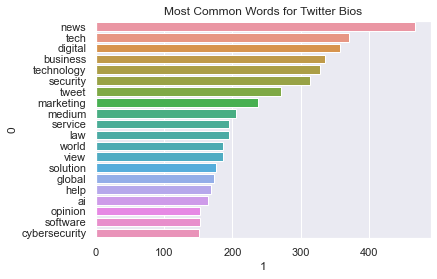

In [247]:
freq_data_desc = pd.DataFrame.from_dict(fdist_desc.most_common(20))
rel = sns.barplot(data = freq_data_desc, x = 1, y = 0).set(title='Most Common Words for Twitter Bios')


In [248]:
most_common_desc = []

for key in fdist_desc.most_common(20):
    most_common_desc.append(key[0])
    
most_common_desc

['news',
 'tech',
 'digital',
 'business',
 'technology',
 'security',
 'tweet',
 'marketing',
 'medium',
 'service',
 'law',
 'world',
 'view',
 'solution',
 'global',
 'help',
 'ai',
 'opinion',
 'software',
 'cybersecurity']

## Clustering by description

In [250]:
%%time 
range_k = [i for i in range(1, 9)]
results_k = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k)

''' results_k[k] = evaluate_k_kmeans_inertia(k, desc_vec) causes a type error
(evaluate_k_kmeans_inertia() takes 1 positional argument but 2 were given) 
so I delete the second argument. Not sure if that changes what you want to do - Shuwen'''

running Kmeans with k=1
running Kmeans with k=2
running Kmeans with k=3
running Kmeans with k=4
running Kmeans with k=5
running Kmeans with k=6
running Kmeans with k=7
running Kmeans with k=8
Wall time: 9min 21s


' results_k[k] = evaluate_k_kmeans_inertia(k, desc_vec) causes a type error\n(evaluate_k_kmeans_inertia() takes 1 positional argument but 2 were given) \nso I delete the second input. Not sure if that changes what you want to do - Shuwen'

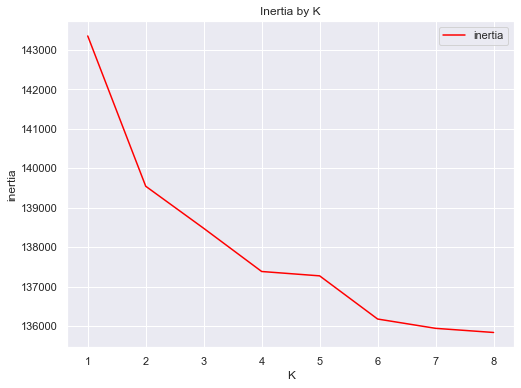

In [251]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K")
ax.legend();

#I would go with 6 - Shuwen

### Finding K

In [161]:
'''%%time 
range_k = [i for i in range(1, 9)]
results_k = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k, desc_vec)
    
    # Look like an identical section with the above one?

TypeError: evaluate_k_kmeans_inertia() takes 1 positional argument but 2 were given

No handles with labels found to put in legend.


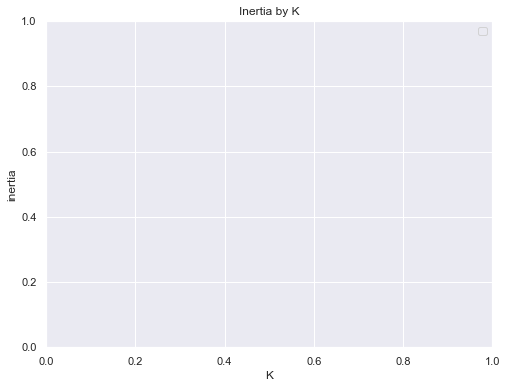

In [162]:
'''fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K")
ax.legend();

 
    # Look like an identical section with the above one?

### Cluster Analysis

In [252]:
estimator_kmeans = KMeans(random_state=42, n_clusters=6)
estimator_kmeans.fit(desc_vec)

KMeans(n_clusters=6, random_state=42)

In [253]:
desc_vec["cluster_id"] = estimator_kmeans.labels_
desc_vec.head()

,00,001,003u0001f4e9,01,01257,01524,01772,01865,01912790228,02,...,électronique,éliminer,étudiant,éxito,êtes,être,òtító,öh,örebro,cluster_id
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [254]:
desc_clusters = desc_vec.groupby('cluster_id').sum()
desc_clusters.head()

,00,001,003u0001f4e9,01,01257,01524,01772,01865,01912790228,02,...,électrique,électronique,éliminer,étudiant,éxito,êtes,être,òtító,öh,örebro
cluster_id,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,2.0,1.0,2.0,1.0,1.0,2.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [256]:
desc_clusters_20 = desc_clusters[['news',
 'tech',
 'digital',
 'business',
 'technology',
 'security',
 'tweet',
 'marketing',
 'medium',
 'service',
 'law',
 'world',
 'view',
 'solution',
 'global',
 'help',
 'ai',
 'opinion',
 'software',
 'cybersecurity']]

desc_clusters_20

#Interestingly we seem to get different words as the top 20. A few words are different and caused a key error. - Shuwen

,news,tech,digital,business,technology,security,tweet,marketing,medium,service,law,world,view,solution,global,help,ai,opinion,software,cybersecurity
cluster_id,,,,,,,,,,,,,,,,,,,,
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,13.0,17.0,10.0,18.0,14.0,12.0,12.0,1.0,6.0,6.0,163.0,5.0,7.0,5.0,10.0,5.0,2.0,1.0,3.0,5.0
2,0.0,1.0,3.0,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,356.0,303.0,280.0,263.0,278.0,244.0,204.0,203.0,162.0,160.0,0.0,0.0,0.0,155.0,138.0,150.0,149.0,137.0,130.0,129.0
4,33.0,30.0,26.0,28.0,23.0,19.0,19.0,8.0,15.0,16.0,0.0,176.0,176.0,12.0,21.0,7.0,8.0,13.0,8.0,8.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


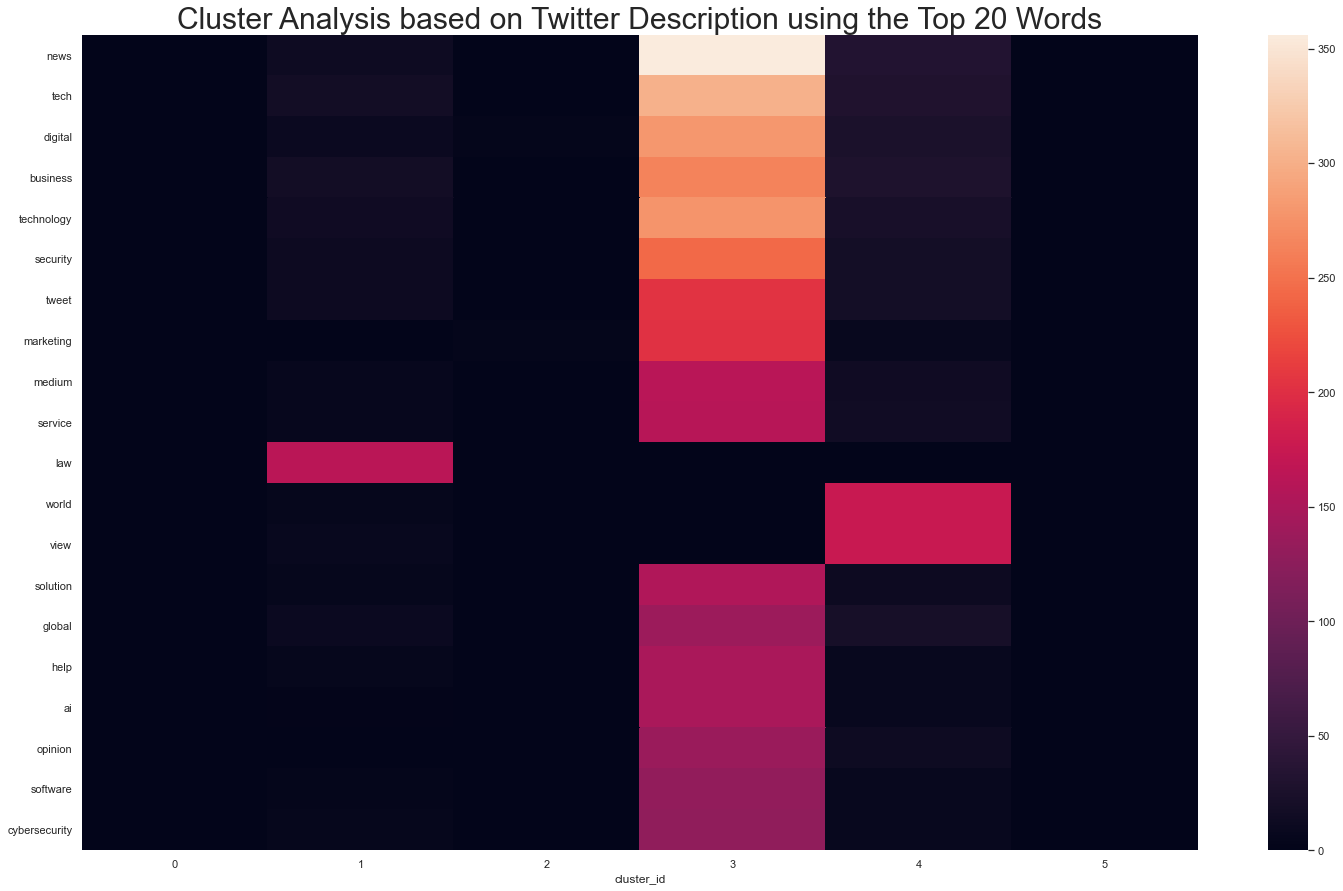

In [257]:
fig, ax = plt.subplots(figsize=(25,15))
sns.heatmap(desc_clusters_20.transpose(), annot=False)
plt.title("Cluster Analysis based on Twitter Description using the Top 20 Words", size = 30);
# Look for rows with a lot of variation to see defining features

## Clustering on other columns

In [42]:
# what if we cluster on the other columns *including* the descrtiption? - Mary
df2 = data[["created_at", "is_quote", "retweet_count", "location", "followers_count", "friends_count", "listed_count", "account_created_at", "verified"]][:3000]
df2.head() # remove is_retweet and protected, no variance

,created_at,is_quote,retweet_count,location,followers_count,friends_count,listed_count,account_created_at,verified
0,2021-06-14 17:05:39,False,0,EU,406,434,14,2019-08-28 05:53:33,False
1,2021-06-10 15:25:22,False,0,EU,406,434,14,2019-08-28 05:53:33,False
2,2021-06-13 21:13:07,False,0,EU,406,434,14,2019-08-28 05:53:33,False
3,2021-06-07 09:30:00,False,1,EU,406,434,14,2019-08-28 05:53:33,False
4,2021-06-06 15:04:52,False,1,EU,406,434,14,2019-08-28 05:53:33,False


In [259]:
#saving only the time
from datetime import datetime, date
df2[["created_at"]] = df2[["created_at"]].apply(pd.to_datetime)

In [260]:
#df2['day_post_created'] = pd.DatetimeIndex(df2["created_at"]).day
#getting only year of when the account was created
# our model is relying a lot on day_post_created. I don't believe it tells us much
# so I am getting rid of it for now and seeing what happens
df2['year_account_created'] = pd.DatetimeIndex(df2["account_created_at"]).year
df2 = df2.drop(["created_at", "account_created_at"], axis=1)
df2['year_account_created'] = df2["year_account_created"].astype("category")
df2.head()

,is_quote,retweet_count,location,followers_count,friends_count,listed_count,verified,year_account_created
0,False,0,EU,406,434,14,False,2019
1,False,0,EU,406,434,14,False,2019
2,False,0,EU,406,434,14,False,2019
3,False,1,EU,406,434,14,False,2019
4,False,1,EU,406,434,14,False,2019


In [264]:
%%time
df2['country'] = df2['location'].apply(findCountry)
df2.head() # finding country for location (takes 8 minutes for 1000 rows, 18 mins for 3000)
#got a timeout error when try to run all; tried 300 in information security and it only took 449 ms - Shuwen 

GeocoderUnavailable: HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Max retries exceeded with url: /search?q=Southern+New+England&format=json&limit=1 (Caused by ReadTimeoutError("HTTPSConnectionPool(host='nominatim.openstreetmap.org', port=443): Read timed out. (read timeout=1)"))

In [265]:
df2 = df2.drop('location', axis = 1)

In [266]:
numerical_data = df2.select_dtypes(np.number)
categorical_data = df2.drop(numerical_data, axis = 1)

### Processing Data

In [267]:
from sklearn.preprocessing import MinMaxScaler

numerical_data_normalized = MinMaxScaler().fit_transform(numerical_data) # this line scales our data

numerical_data_normalized = pd.DataFrame(              #this pops it back in data frame format 
    numerical_data_normalized,
    columns=numerical_data.columns) 

numerical_data_normalized.head()

,retweet_count,followers_count,friends_count,listed_count
0,0.000000,0.000061,0.004313,0.000381
1,0.000000,0.000061,0.004313,0.000381
2,0.000000,0.000061,0.004313,0.000381
3,0.003891,0.000061,0.004313,0.000381
4,0.003891,0.000061,0.004313,0.000381


In [268]:
categorical_data_codified = pd.get_dummies(
                                    categorical_data, 
                                    drop_first=True,
                                    dtype="int64"
).reset_index()
categorical_data_codified.head()

,index,is_quote,verified,year_account_created_2007,year_account_created_2008,year_account_created_2009,year_account_created_2010,year_account_created_2011,year_account_created_2012,year_account_created_2013,year_account_created_2014,year_account_created_2015,year_account_created_2016,year_account_created_2017,year_account_created_2018,year_account_created_2019,year_account_created_2020,year_account_created_2021
0,0,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,3,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,4,False,False,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [269]:
categorical_data_codified = categorical_data_codified.drop('index', axis = 1)


In [270]:
df2_processed = pd.concat([
                            numerical_data_normalized,
                            categorical_data_codified
                        ], axis=1
).reset_index()

In [271]:
df2_processed = df2_processed.drop('index', axis = 1)


In [272]:
df2_processed.head()


,retweet_count,followers_count,friends_count,listed_count,is_quote,verified,year_account_created_2007,year_account_created_2008,year_account_created_2009,year_account_created_2010,...,year_account_created_2012,year_account_created_2013,year_account_created_2014,year_account_created_2015,year_account_created_2016,year_account_created_2017,year_account_created_2018,year_account_created_2019,year_account_created_2020,year_account_created_2021
0,0.000000,0.000061,0.004313,0.000381,False,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.000000,0.000061,0.004313,0.000381,False,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.000000,0.000061,0.004313,0.000381,False,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.003891,0.000061,0.004313,0.000381,False,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.003891,0.000061,0.004313,0.000381,False,False,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


### Finding K

In [285]:
%%time 
range_k = [2, 3, 4, 5, 8, 10, 15, 20, 25, 30]
results_k = {}
for k in range_k:
    results_k[k] = evaluate_k_kmeans_inertia(k)

running Kmeans with k=2
running Kmeans with k=3
running Kmeans with k=4
running Kmeans with k=5
running Kmeans with k=8
running Kmeans with k=10
running Kmeans with k=15
running Kmeans with k=20
running Kmeans with k=25
running Kmeans with k=30
Wall time: 17min


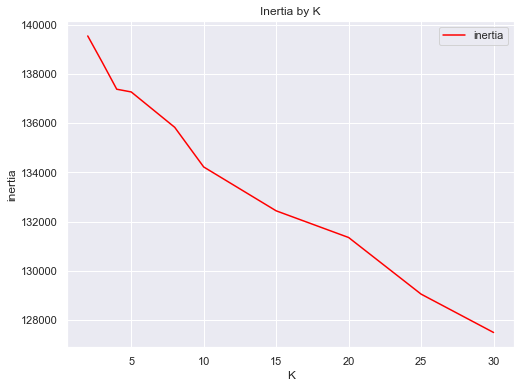

In [286]:
fig, ax = plt.subplots(figsize=(8,6))
ax = sns.lineplot(
    [c[0] for c in results_k.items()],
    [c[1] for c in results_k.items()], label="inertia", color="red")
ax.set_xlabel("K")
ax.set_ylabel("inertia")
ax.set_title("Inertia by K")
ax.legend();

### Cluster Analysis

In [287]:
estimator_kmeans = KMeans(random_state=42, n_clusters=10) # 5 for now (the elbow curve is janky)

estimator_kmeans.fit(df2_processed)

KMeans(n_clusters=10, random_state=42)

In [288]:
df2["cluster_id"] = estimator_kmeans.labels_
df2.head()

,is_quote,retweet_count,followers_count,friends_count,listed_count,verified,year_account_created,cluster_id
0,False,0,406,434,14,False,2019,6
1,False,0,406,434,14,False,2019,6
2,False,0,406,434,14,False,2019,6
3,False,1,406,434,14,False,2019,6
4,False,1,406,434,14,False,2019,6


In [289]:
df2.cluster_id.value_counts()

6    674
1    438
7    413
3    353
4    236
8    208
5    196
9    184
2    174
0    124
Name: cluster_id, dtype: int64

In [290]:
cluster_summary(1, df2)

{'is_quote': 0.01141552511415525,
 'verified': 0.04337899543378995,
 'year_account_created': 2012,
 'retweet_count': 0.4680365296803653,
 'followers_count': 43241.19406392694,
 'friends_count': 1067.5753424657535,
 'listed_count': 125.8310502283105,
 'cluster_id': 1.0}

In [291]:
cluster_comparison(0,1,2,3,4,5,6,7,8,9)

cluster_id,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
is_quote,0.008065,0.011416,0.005747,0.028329,0.012712,0.020408,0.056380,0.019370,0.000000,0.038043
verified,0.080645,0.043379,0.551724,0.062323,0.025424,0.045918,0.000000,0.217918,0.000000,0.108696
year_account_created,2015.000000,2012.000000,2008.000000,2010.000000,2017.000000,2020.000000,2016.000000,2009.000000,2021.000000,2011.000000
retweet_count,1.677419,0.468037,6.603448,1.617564,1.334746,0.816327,1.025223,0.961259,1.831731,2.342391
followers_count,81885.008065,43241.194064,505886.149425,27786.900850,5855.237288,1635.117347,8396.896142,98440.469734,229.937500,147138.353261
friends_count,5737.911290,1067.575342,1388.195402,19104.835694,2004.381356,446.326531,3115.727003,2292.723971,244.052885,2800.983696
listed_count,536.653226,125.831050,3206.660920,1215.181303,91.961864,4.127551,209.097923,648.384988,0.730769,1757.614130


In [292]:
cluster_results = kmeans_cluster(df2_processed, 5)
cluster_summary2 = graph_summary_clustering(cluster_results)

In [293]:
#cluster_summary2 = cluster_summary2.drop('cluster_id', axis = 1)
cluster_summary2

,followers_count,friends_count,is_quote,listed_count,retweet_count,verified,year_account_created_2007,year_account_created_2008,year_account_created_2009,year_account_created_2010,...,year_account_created_2012,year_account_created_2013,year_account_created_2014,year_account_created_2015,year_account_created_2016,year_account_created_2017,year_account_created_2018,year_account_created_2019,year_account_created_2020,year_account_created_2021
Cluster,,,,,,,,,,,,,,,,,,,,,
0,0.014175,0.028853,0.035920,0.021696,0.007810,0.094828,0.030891,0.094109,0.0,0.0,...,0.0,0.08477,0.086207,0.08908,0.122126,0.16954,0.096983,0.089799,0.000000,0.000000
1,0.006449,0.010609,0.011416,0.003422,0.001821,0.043379,0.000000,0.000000,0.0,0.0,...,1.0,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
2,0.000136,0.003401,0.009901,0.000065,0.005211,0.022277,0.000000,0.000000,0.0,0.0,...,0.0,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.485149,0.514851
3,0.014682,0.022785,0.019370,0.017633,0.003740,0.217918,0.000000,0.000000,1.0,0.0,...,0.0,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
4,0.004144,0.189862,0.028329,0.033046,0.006294,0.062323,0.000000,0.000000,0.0,1.0,...,0.0,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000


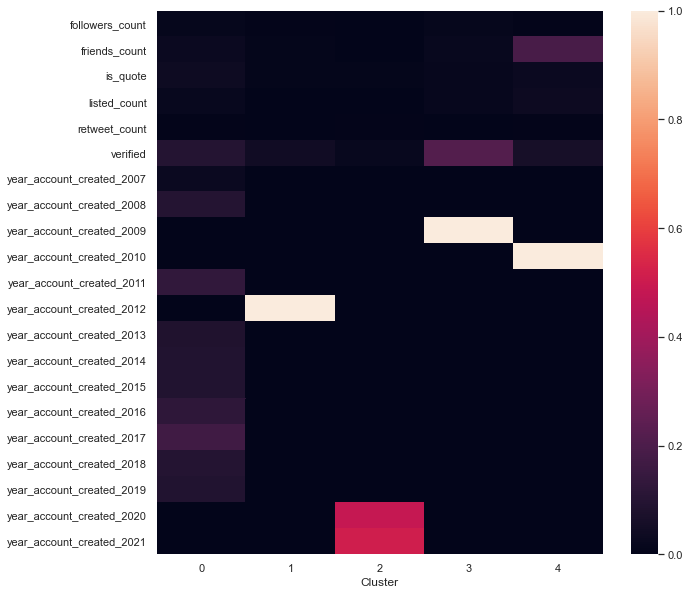

In [294]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cluster_summary2.transpose(), annot=False);

## AI

In [62]:
#tried to use regex to include ai; couldn't fix the bug

import re

AI_df = re.findall("AI","artificial intelligence", str(text_lst)) | re.findall("^ai$", str(text_lst))


TypeError: unsupported operand type(s) for &: 'str' and 'int'

In [64]:
AI_df = text['text'].str.contains('artificial intelligence') | text['text'].str.contains('AI')

In [39]:
AI_df.shape
#sample too small

(13, 4)

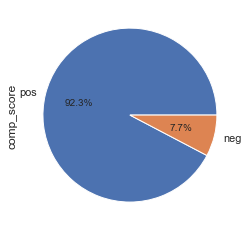

In [41]:
ai_comp_score_counts = AI_df.comp_score.value_counts()
ai_comp_score_counts.plot.pie(autopct="%.1f%%");

In [44]:
df3 = data[["text", "description"]]
df3.head()

,text,description
0,"The @EFF finds that the proposed modifications to the HIPAA would ""invade your most personal and intimiate health data."" \r\n\r\nStating that trust in healthcare is crucial and especially so during the #COVID pandemic.\r\n\r\nRead more: https://t.co/ReuoQ3mF9p",bi-monthly newsletter on #privacy #design #product #technology & more by @MiraNova_Tweet & the team. We are open for collabs. All info via DM.
1,The European Parliament passes the new #EU #COVID19 Certificate Regulation detailing peoples' COVID information.\r\n\r\nPromising that all personal data will be processed in line with the #GDPR\r\n\r\nRead more: https://t.co/8PGuChsV5F,bi-monthly newsletter on #privacy #design #product #technology & more by @MiraNova_Tweet & the team. We are open for collabs. All info via DM.
2,"To gain better control over the increasingly powerful technology sector in #China, new regulations in China make it harder for big tech to refuse the government's request for #datasharing. \r\n\r\n#datasecurity\r\n\r\nRead more: https://t.co/piSfs3NW4J",bi-monthly newsletter on #privacy #design #product #technology & more by @MiraNova_Tweet & the team. We are open for collabs. All info via DM.
3,What if the consumers are on the driving seat to agree or disagree to the #privacypolicy of the #tech giants? Article by Beth Magnuson\r\nexplains #DataPrivacy &amp; #innovation on @VentureBeat \r\n\r\nhttps://t.co/n2pFOwWSmi\r\n\r\n#PrivacyTech #Technology #DataPrivacy,bi-monthly newsletter on #privacy #design #product #technology & more by @MiraNova_Tweet & the team. We are open for collabs. All info via DM.
4,"""Vera Jourová says new rules are needed to limit the bulk collection of Europeans’ data.""\r\n\r\nThe #EU is requiring new legislation limiting #US government agencies from accessing European data. \r\n\r\nRead more at: https://t.co/04avhPjhCd",bi-monthly newsletter on #privacy #design #product #technology & more by @MiraNova_Tweet & the team. We are open for collabs. All info via DM.


In [45]:
df3_AI = df3[df3['text'].str.contains('AI') | df3['text'].str.contains('artificial intelligence')]
df3_AI.head()

,text,description
148,Check it. NSW Police using artificial intelligence to analyse CCTV footage https://t.co/LtoAamOX7K via @ZDNet &amp; @ashabeeeee #tech #digital #data #privacy,"Co-founder @pbdlab, develop data privacy culture and collaborative measures for future data society. Let’s make collaboration for sustainable society together!"
187,"Check it. Expect an Orwellian future if AI isn't kept in check, Microsoft exec says https://t.co/WG0Yq2POAz #tech #digital #data #privacy","Co-founder @pbdlab, develop data privacy culture and collaborative measures for future data society. Let’s make collaboration for sustainable society together!"
201,"Update. Voice AIs are raising competition concerns, EU finds https://t.co/fUk2EiX8bq via @techcrunch #tech #digital #data #privacy","Co-founder @pbdlab, develop data privacy culture and collaborative measures for future data society. Let’s make collaboration for sustainable society together!"
220,Update. How edge AI can make enterprises more agile https://t.co/QmT9jgSbrn via @VentureBeat #tech #digital #data #privacy,"Co-founder @pbdlab, develop data privacy culture and collaborative measures for future data society. Let’s make collaboration for sustainable society together!"
238,Learn it. The AI Act: getting the first step right https://t.co/inwK5CsNso #tech #digital #data #privacy,"Co-founder @pbdlab, develop data privacy culture and collaborative measures for future data society. Let’s make collaboration for sustainable society together!"


In [47]:
df3_AI = df3_AI.dropna()
df3_AI['description'] = df3_AI['description'].apply(cleanTxt)

df3_AI.head()

,text,description
148,Check it. NSW Police using artificial intelligence to analyse CCTV footage https://t.co/LtoAamOX7K via @ZDNet &amp; @ashabeeeee #tech #digital #data #privacy,cofounder pbdlab develop data privacy culture and collaborative measures for future data society lets make collaboration for sustainable society together
187,"Check it. Expect an Orwellian future if AI isn't kept in check, Microsoft exec says https://t.co/WG0Yq2POAz #tech #digital #data #privacy",cofounder pbdlab develop data privacy culture and collaborative measures for future data society lets make collaboration for sustainable society together
201,"Update. Voice AIs are raising competition concerns, EU finds https://t.co/fUk2EiX8bq via @techcrunch #tech #digital #data #privacy",cofounder pbdlab develop data privacy culture and collaborative measures for future data society lets make collaboration for sustainable society together
220,Update. How edge AI can make enterprises more agile https://t.co/QmT9jgSbrn via @VentureBeat #tech #digital #data #privacy,cofounder pbdlab develop data privacy culture and collaborative measures for future data society lets make collaboration for sustainable society together
238,Learn it. The AI Act: getting the first step right https://t.co/inwK5CsNso #tech #digital #data #privacy,cofounder pbdlab develop data privacy culture and collaborative measures for future data society lets make collaboration for sustainable society together


In [48]:
df3_AI['description'] = df3_AI['description'].apply(stopWords)

In [50]:
desc_AI = df3_AI[['description']]
desc_AI.head()
#same person

,description
148,cofounder pbdlab develop culture collaborative measure future society let make collaboration sustainable society together
187,cofounder pbdlab develop culture collaborative measure future society let make collaboration sustainable society together
201,cofounder pbdlab develop culture collaborative measure future society let make collaboration sustainable society together
220,cofounder pbdlab develop culture collaborative measure future society let make collaboration sustainable society together
238,cofounder pbdlab develop culture collaborative measure future society let make collaboration sustainable society together


In [51]:
desc_AI_words = []

for row in desc_AI['description']:
    for word in str(row).split(" "):
        desc_AI_words.append(word)
        
desc_AI_words[:5]

['cofounder', 'pbdlab', 'develop', 'culture', 'collaborative']

In [53]:
from nltk.probability import FreqDist
fdist_AI_desc = FreqDist()
for word in desc_AI_words:
    fdist_AI_desc[word]+=1
fdist_AI_desc

FreqDist({'ai': 50, 'news': 31, 'tech': 31, 'technology': 30, 'digital': 28, 'policy': 20, 'security': 19, 'global': 18, 'iot': 17, 'science': 17, ...})

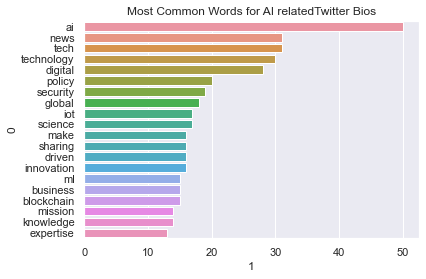

In [54]:
freq_data_desc_AI = pd.DataFrame.from_dict(fdist_AI_desc.most_common(20))
rel = sns.barplot(data = freq_data_desc_AI, x = 1, y = 0).set(title='Most Common Words for AI relatedTwitter Bios')

# Word Cloud

In [55]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

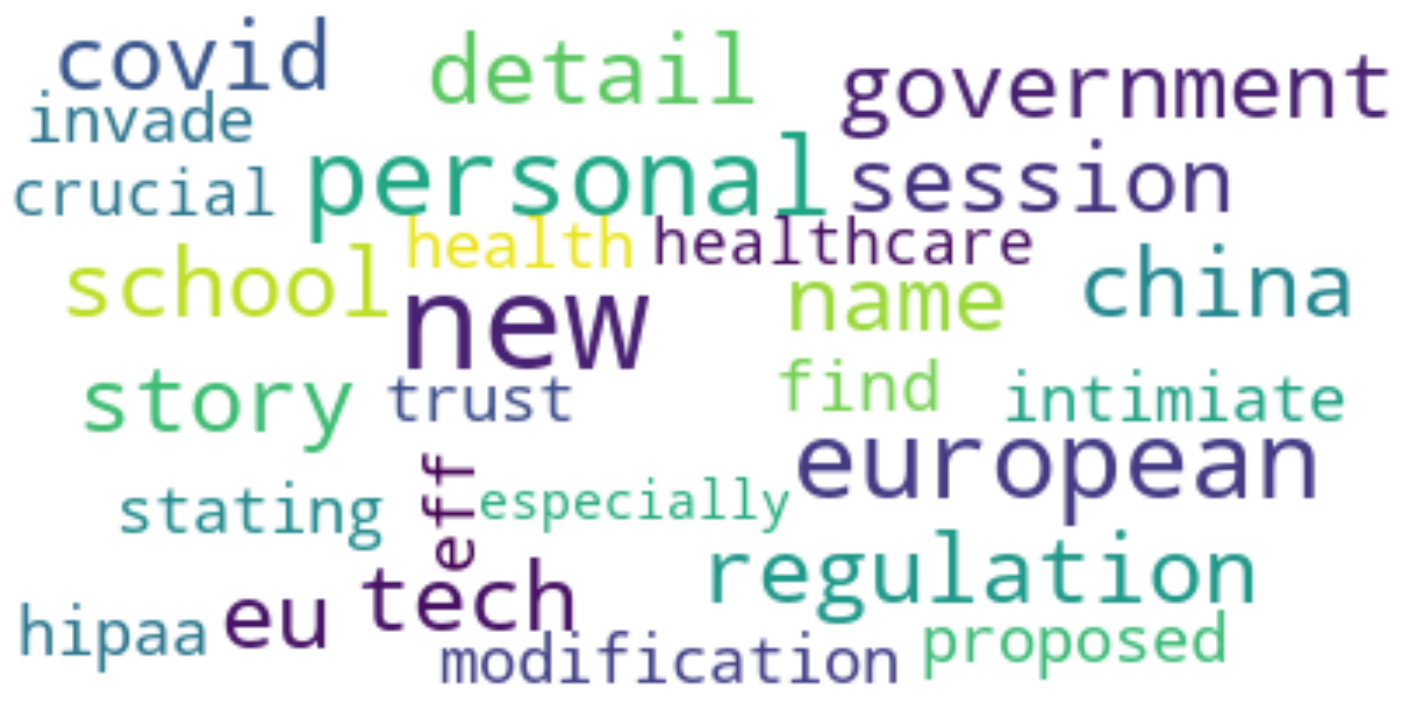

In [297]:
stopwords = set(STOPWORDS)
new_stopwords=stopwords.union(text['text'])
wc = WordCloud(
         background_color="white", max_words=2000,
         min_font_size =15, max_font_size=40, relative_scaling =
         0.5, stopwords=new_stopwords,normalize_plurals= True)
import re
textonly = re.sub("", "",str(text['text']))
wc.generate(textonly)
plt.figure(figsize=(25,25))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
#Show the wordcloud
plt.show()

#have to change the code a little; the original one does not cause error but count compound/pos/neg/neutral into the cloud -Shuwen

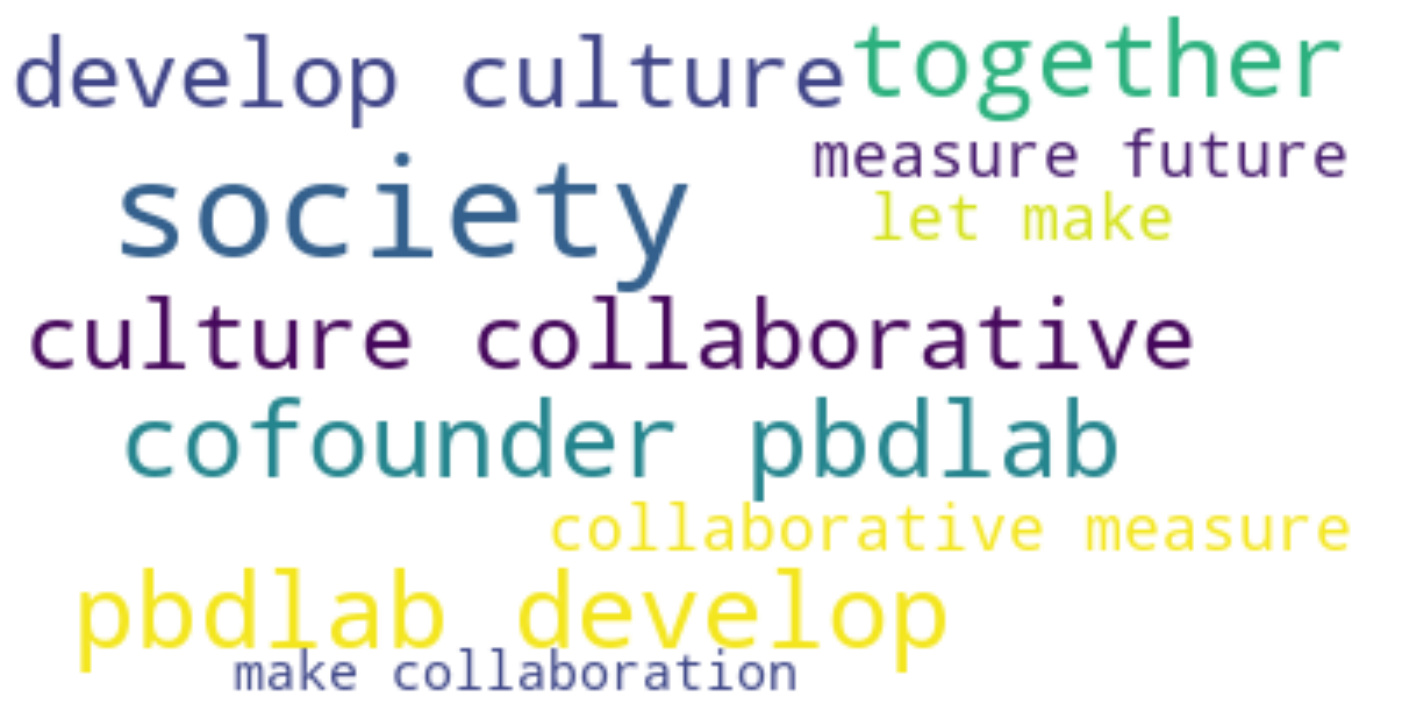

In [65]:
stopwords = set(STOPWORDS)
new_stopwords=stopwords.union(df3_AI['description'])
wc = WordCloud(
         background_color="white", max_words=2000,
         min_font_size =15, max_font_size=40, relative_scaling =
         0.5, stopwords=new_stopwords,normalize_plurals= True)
import re
textonly = re.sub("", "",str(df3_AI['description']))
wc.generate(textonly)
plt.figure(figsize=(25,25))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
#Show the wordcloud
plt.show()

#duplicate words?